In [1]:
import networkx as nx

# Load the graph
graphml_path = r"B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml"
G = nx.read_graphml(graphml_path)

# Global clustering coefficient
global_clustering = nx.transitivity(G)
print(f"Global Clustering Coefficient (Transitivity): {global_clustering:.4f}")


Global Clustering Coefficient (Transitivity): 0.0685


In [2]:

# Parameters of original graph
n = G.number_of_nodes()
m = G.number_of_edges()

# Generate Erdős–Rényi random graph with same nodes and edge probability
p = (2 * m) / (n * (n - 1))
G_random = nx.erdos_renyi_graph(n, p)

# Global clustering for random graph
random_clustering = nx.transitivity(G_random)
print(f"Random Graph Clustering Coefficient: {random_clustering:.4f}")


Random Graph Clustering Coefficient: 0.0302


In [6]:
import networkx as nx
import pandas as pd

# Load the graph
graphml_path = r'B:\Final Network Science Project\Data\grpah file\Shipping_Network.graphml'
G = nx.read_graphml(graphml_path)

# Compute local clustering coefficients
local_clustering = nx.clustering(G)

# Compute degree of each node
degree_dict = dict(G.degree())

# Combine into DataFrame
clustering_df = pd.DataFrame({
    'Port': list(G.nodes()),
    'Degree': [degree_dict[node] for node in G.nodes()],
    'Local Clustering Coefficient': [local_clustering[node] for node in G.nodes()]
})

# Sort by Degree or Clustering Coefficient (optional)
clustering_df = clustering_df.sort_values(by='Degree', ascending=False)

# Save the full table to CSV
clustering_df.to_csv("clustering_by_degree_full.csv", index=False)

print("data saved to 'clustering_by_degree_full.csv'")


data saved to 'clustering_by_degree_full.csv'


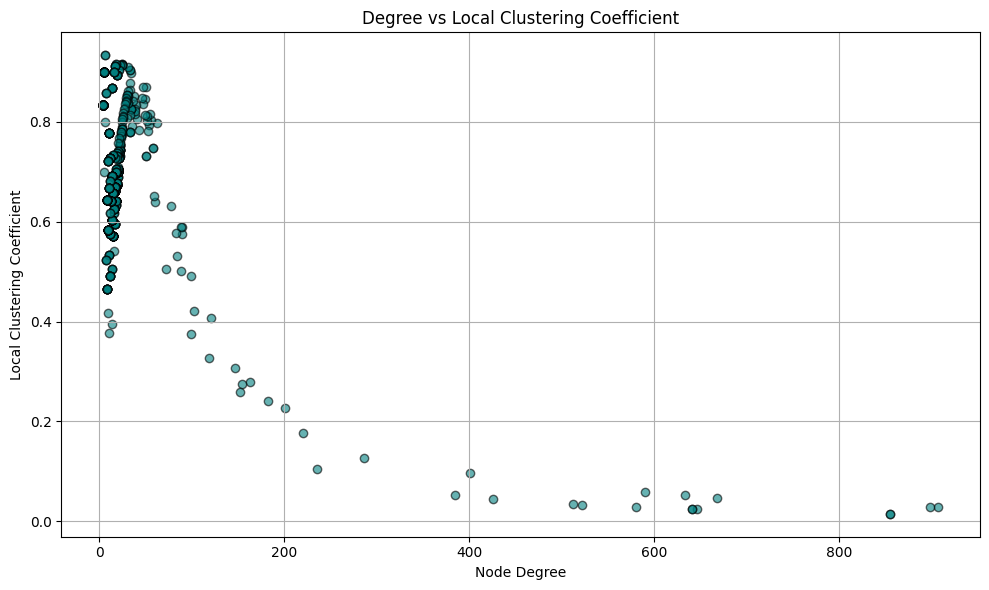

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of Degree vs Local Clustering Coefficient
plt.figure(figsize=(10, 6))
plt.scatter(clustering_df['Degree'], clustering_df['Local Clustering Coefficient'], alpha=0.6, color='teal', edgecolors='k')
plt.title('Degree vs Local Clustering Coefficient')
plt.xlabel('Node Degree')
plt.ylabel('Local Clustering Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


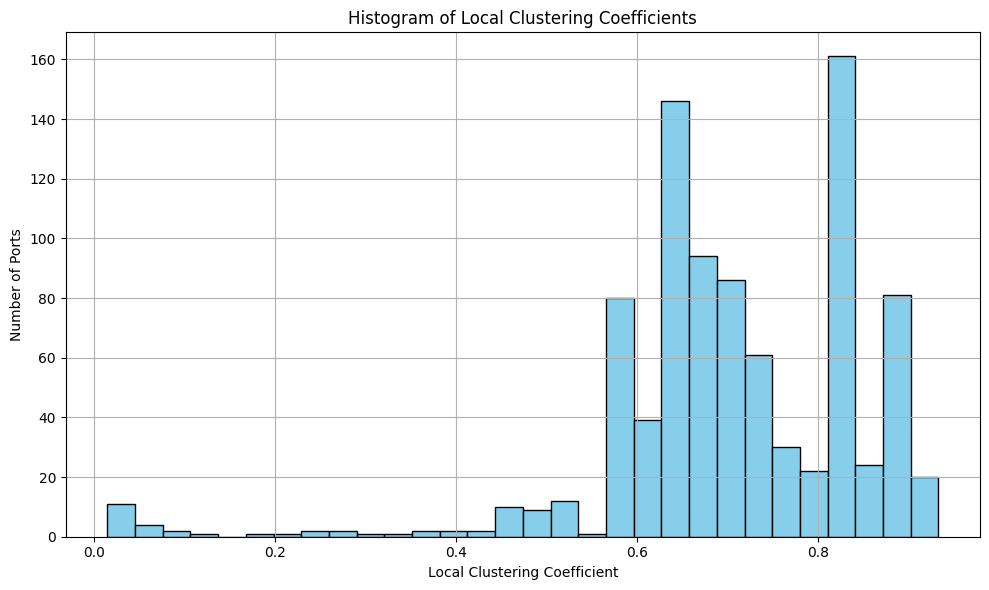

In [8]:
import matplotlib.pyplot as plt

# Histogram of Local Clustering Coefficients
plt.figure(figsize=(10, 6))
plt.hist(clustering_df['Local Clustering Coefficient'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Local Clustering Coefficients')
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Number of Ports')
plt.grid(True)
plt.tight_layout()
plt.show()
